In [30]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [31]:
df_plot = df['job_title_short'].value_counts().to_frame()

df_plot

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


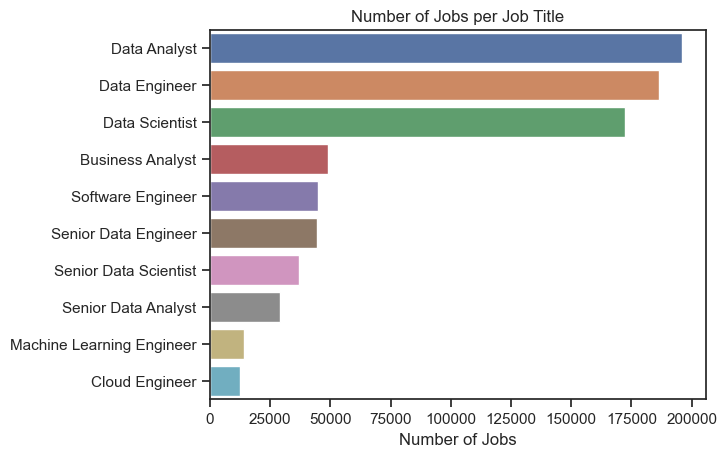

In [32]:
# Bar Plot

sns.barplot(data=df_plot, x='count', y=df_plot.index)
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Countries EDA

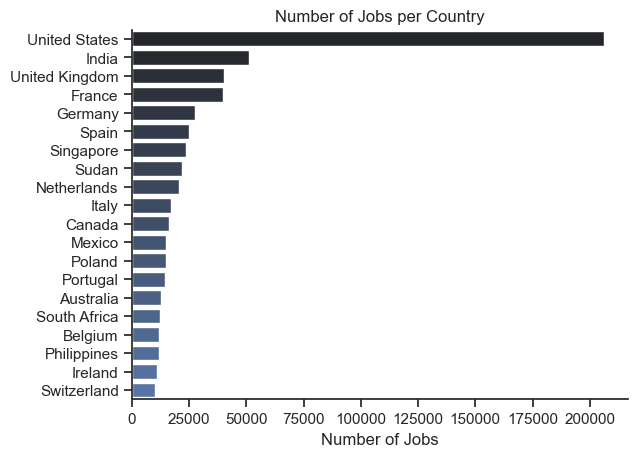

In [33]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.barplot(data=df_plot, x='count', y=df_plot.index,  palette='dark:b')
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()
plt.show()

### Companies to Explore in India

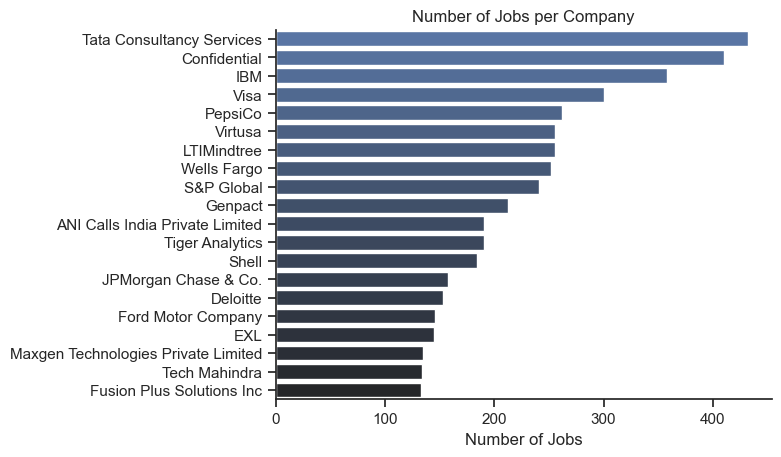

In [42]:
df_plot = df[df['job_country'] == 'India']['company_name'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y=df_plot.index, palette='dark:b_r')
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()
